In [1]:
import math
import cv2
import torch
import os
import heapq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import array
from scipy.optimize import linear_sum_assignment as hungarian
#from config_profile1 import args
from numpy import array
%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [2]:
images = torch.load("wangxint_descriptions_1.pt")
query = torch.load("wangxint_descriptions_2.pt")
# images = torch.load("wangxint_descriptions_140.pt")
# query = torch.load("wangxint_descriptions_35.pt")
# simi_oto = torch.zeros(5, 100, 100)
dist_oto = torch.zeros(5, 100, 100)
# simi_mtm = torch.zeros(5, 5)
col = torch.zeros(5, 100)
threshold = 0.051
for i in range(5):
#     for j in range(5):
        #print (query[1])
        #print(images[1])
    dist = torch.zeros(100, 100)
    for p in range(100):
        for k in range(100):
            dist[p][k] = torch.dist(query[i][p], images[i][k])
            dist_oto[i][p][k] = dist[p][k]
    
    simi = torch.exp(-dist)
#         print(simi)
    row_ind, col_ind = hungarian(dist)
    col[i] = torch.from_numpy(col_ind)
#     simi_oto[i]= simi[row_ind, col_ind].sum()
    print(col_ind)
#         norm = torch.norm(simi, 2)
#         regular = simi/norm
# #         print(regular)
#         for p in range(100):
#             for k in range(100):
#                 if regular[p][k] > threshold:
#                     simi_mtm[i][j] += simi[p][k] 
#print(col)

# print (simi_mtm)
# torch.save(simi_oto, "wangxint_oto.pt")
# torch.save(simi_mtm, "wangxint_mtm.pt")
        
    #print(summ[i])
#print(summ)
#print(dist)

[21 86 50 80 60 84 95 88 72 94 14 53 27 24 18 17 15 69  1 48 16  8  9 11
 28 91  5 61 85 13 56 42 63  7 41  6 75 49 92 46 45 89 79 78 90  2 58 96
 52 98 55 99 25 26 35 47 62 30 77 34 29 97 36 20 67 37 74 73 44 43 31 23
 19 32 59 51 57 66  4 68 81  0 10 87 76 39 82  3 38 40 93 83 33 70 12 54
 22 71 64 65]
[98 71 11 59 13 47 39  5 10  3 20 16 63  8 30 33 75  0 26 17 94 28 25 29
 45  7 57 15 97 70 74 86 73 31 89 90 27 43 42 49 54 41 53 38 46 82 58 32
 52 60 36 61 91 35 34 88 80 51 85  9 96 40 84 55 21  2 24 56 50 99 87 68
 72 48 62 37 64  4  1  6 19 18 65 69 83 14 77 67 79 95 66 76 81 44 92 23
 93 78 12 22]
[54 79 88 11 38 97  9 95 99 22 23 39  7 83 12 30 50 89 55  4  8 34 31 33
 57 27 37 52 29  2 41 51 20 40 42 94 48 28 10 61 92 17 16 64 69 19 87 71
 66 44 24 84 62 96 14 76 75 43 80  5  3  6 25 60 59 74 56 65 49 18 90 35
 63 58 15 68 85 72 47 70 36  0  1 82 45 21 98 81 13 86 77 78 26 32 46 53
 67 73 93 91]
[13  0 40  4 33 15 49 54 46 37 96 82 89 58 45 22 24 66 14  8 16 25 44 98
 21 55 76

In [3]:
pts_1 = torch.load("wangxint_keypoints_1.pt")
pts_2 = torch.load("wangxint_keypoints_2.pt")
pts1 = torch.zeros(5, 100, 3)
pts2 = torch.zeros(5, 100, 3)

for i in range(5):
    for j in range(100):
        pts1[i][j][0] = pts_1[i][j][0]
        pts1[i][j][1] = pts_1[i][j][1]
        pts1[i][j][2] = 1
for i in range(5):
    for j in range(100):
        pts2[i][j][0] = pts_2[i][int(col[i][j])][0]
        pts2[i][j][1] = pts_2[i][int(col[i][j])][1]
        pts2[i][j][2] = 1
# pts1 = np.int32(pts1)
# pts2 = np.int32(pts2)


In [4]:

# x1 = torch.FloatTensor([[[520,428], [401,402], [320,388], [270,378], [230,370], [521,746], [406,640], [325,575], [276,535], [237,504]],[[623,451],[441,493],[384,266],[423,240],[158,204],[7,128],[617,215],[600,246],[160,147],[121,177]],[[388,114],[227,195],[322,75],[271,301],[151,189],[407,55],[380,159],[324,35],[110,118],[414,82]],[[96,569],[289,562],[393,131],[478,144],[107,218],[280,652],[348,270],[250,244],[80,198],[109,150]],[[1144,321],[531,1119],[532,949],[106,1088],[1049,1246],[424,83],[536,217],[567,512],[1210,975],[1154,960]]])
# x2 = torch.FloatTensor([[[529,430], [416,403], [337,389], [296,380], [256,371], [527,749], [416,641], [341,576], [298,536], [263,505]],[[640,449],[444,492],[409,265],[452,239],[192,203],[45,127],[647,214],[630,245],[195,147],[156,176]],[[353,114],[218,194],[288,75],[254,301],[116,190],[372,55],[346,159],[289,35],[74,118],[379,82]],[[95,624],[341,609],[429,127],[521,148],[106,212],[334,726],[391,268],[277,233],[74,196],[109,139]],[[1220,323],[601,1120],[601,950],[172,1089],[1104,1245],[498,88],[611,221],[641,515],[1286,976],[1230,962]]])



x_1 = torch.FloatTensor([[[781,528],[595,409],[167,499],[430,294],[520,428],[848,504],[611,517],[938,650],[308,191],[401,401]],[[623,451],[441,493],[384,266],[423,240],[158,204],[7,128],[617,215],[600,246],[160,147],[121,177]],[[388,114],[227,195],[322,75],[271,301],[151,189],[407,55],[380,159],[324,35],[110,118],[414,82]],[[96,569],[289,562],[393,131],[478,144],[107,218],[280,652],[348,270],[250,244],[80,198],[109,150]],[[1144,321],[531,1119],[532,949],[106,1088],[1049,1246],[424,83],[536,217],[567,512],[1210,975],[1154,960]]])
x_2 = torch.FloatTensor([[[783,530],[609,412],[195,497],[450,296],[531,430],[857,507],[624,520],[962,657],[329,194],[416,404]],[[640,449],[444,492],[409,265],[452,239],[192,203],[45,127],[647,214],[630,245],[195,147],[156,176]],[[353,114],[218,194],[288,75],[254,301],[116,190],[372,55],[346,159],[289,35],[74,118],[379,82]],[[95,624],[341,609],[429,127],[521,148],[106,212],[334,726],[391,268],[277,233],[74,196],[109,139]],[[1220,323],[601,1120],[601,950],[172,1089],[1104,1245],[498,88],[611,221],[641,515],[1286,976],[1230,962]]])


F = torch.zeros(5,3,3)
for i in range(5):
    pt1 = x_1[i].numpy()
    pt2 = x_2[i].numpy()
#     f, mask = cv2.findFundamentalMat(pt1,pt2,cv2.FM_RANSAC)###################################
    f, mask = cv2.findFundamentalMat(pt1,pt2,cv2.FM_RANSAC)
    F[i] = torch.from_numpy(f)
print(F)


#2:[[281, 162],[241, 299],[353, 114],[171, 192],[200, 156],[185, 207],[82, 163],[127, 40],[396, 200],[389, 55]]
#1:[[314, 162],[258, 299],[387, 114],[180, 194],[206, 158],[192, 205],[116, 163],[163, 40],[431, 200],[423, 55]]
x1 = torch.FloatTensor([[[781,528,1],[595,409,1],[167,499,1],[430,294,1],[520,428,1],[848,504,1],[611,517,1],[938,650,1],[308,191,1],[401,401,1]],[[623,451,1],[441,493,1],[384,266,1],[423,240,1],[158,204,1],[7,128,1],[617,215,1],[600,246,1],[160,147,1],[121,177,1]],[[388,114,1],[227,195,1],[322,75,1],[271,301,1],[151,189,1],[407,55,1],[380,159,1],[324,35,1],[110,118,1],[414,82,1]],[[96,569,1],[289,562,1],[393,131,1],[478,144,1],[107,218,1],[280,652,1],[348,270,1],[250,244,1],[80,198,1],[109,150,1]],[[1144,321,1],[531,1119,1],[532,949,1],[106,1088,1],[1049,1246,1],[424,83,1],[536,217,1],[567,512,1],[1210,975,1],[1154,960,1]]])
x2 = torch.FloatTensor([[[783,530,1],[609,412,1],[195,497,1],[450,296,1],[531,430,1],[857,507,1],[624,520,1],[962,657,1],[329,194,1],[416,404,1]],[[640,449,1],[444,492,1],[409,265,1],[452,239,1],[192,203,1],[45,127,1],[647,214,1],[630,245,1],[195,147,1],[156,176,1]],[[353,114,1],[218,194,1],[288,75,1],[254,301,1],[116,190,1],[372,55,1],[346,159,1],[289,35,1],[74,118,1],[379,82,1]],[[95,624,1],[341,609,1],[429,127,1],[521,148,1],[106,212,1],[334,726,1],[391,268,1],[277,233,1],[74,196,1],[109,139,1]],[[1220,323,1],[601,1120,1],[601,950,1],[172,1089,1],[1104,1245,1],[498,88,1],[611,221,1],[641,515,1],[1286,976,1],[1230,962,1]]])
# x1 = torch.FloatTensor([[[781,528,1],[595,409,1],[167,499,1],[430,294,1],[520,428,1],[848,504,1],[611,517,1],[938,650,1],[308,191,1],[401,401,1]],[[623,451,1],[441,493,1],[384,266,1],[423,240,1],[158,204,1],[7,128,1],[617,215,1],[600,246,1],[160,147,1],[121,177,1]],[[314, 162,1],[258, 299,1],[387, 114,1],[180, 194,1],[206, 158,1],[192, 205,1],[116, 163,1],[163, 40,1],[431, 200,1],[423, 55,1]],[[96,569,1],[289,562,1],[393,131,1],[478,144,1],[107,218,1],[280,652,1],[348,270,1],[250,244,1],[80,198,1],[109,150,1]],[[1144,321,1],[531,1119,1],[532,949,1],[106,1088,1],[1049,1246,1],[424,83,1],[536,217,1],[567,512,1],[1210,975,1],[1154,960,1]]])
# x2 = torch.FloatTensor([[[783,530,1],[609,412,1],[195,497,1],[450,296,1],[531,430,1],[857,507,1],[624,520,1],[962,657,1],[329,194,1],[416,404,1]],[[640,449,1],[444,492,1],[409,265,1],[452,239,1],[192,203,1],[45,127,1],[647,214,1],[630,245,1],[195,147,1],[156,176,1]],[[281, 162,1],[241, 299,1],[353, 114,1],[171, 192,1],[200, 156,1],[185, 207,1],[82, 163,1],[127, 40,1],[396, 200,1],[389, 55,1]],[[95,624,1],[341,609,1],[429,127,1],[521,148,1],[106,212,1],[334,726,1],[391,268,1],[277,233,1],[74,196,1],[109,139,1]],[[1220,323,1],[601,1120,1],[601,950,1],[172,1089,1],[1104,1245,1],[498,88,1],[611,221,1],[641,515,1],[1286,976,1],[1230,962,1]]])
W = torch.FloatTensor(5,10,9)
for a in range(5):
    for i in range(10):
        l = 0
        for j in range(3):
            for k in range(3):
                W[a][i][l] = x2[a][i][j] * x1[a][i][k]
                l+=1
w = torch.zeros(5,3,3)
for i in range(5):
    u,s,vh = np.linalg.svd(W[i],full_matrices=True)
    f = vh[-1].reshape(3,3)
    w[i] = torch.tensor(f)
    print(w[i])

tensor([[[ 1.4143e-04, -8.5723e-04, -8.6937e-01],
         [ 4.3416e-04,  3.1523e-05, -3.6466e-02],
         [ 9.0013e-01,  1.4286e-01,  1.0000e+00]],

        [[ 6.6485e-06, -1.0458e-04, -5.0857e-02],
         [ 8.6608e-05, -1.8749e-05,  1.9990e-01],
         [ 4.8797e-02, -1.8447e-01,  1.0000e+00]],

        [[-5.9605e-08, -2.2507e-04,  1.4941e-01],
         [ 2.3270e-04, -1.0729e-06, -4.1479e+14],
         [-1.3379e-01,  4.1479e+14,  1.0000e+00]],

        [[ 1.5544e-05, -2.7086e-05,  5.7406e-02],
         [ 1.3423e-05,  3.2375e-06, -1.7726e-02],
         [-7.1055e-02,  1.9592e-02,  1.0000e+00]],

        [[-1.8322e-08,  1.3524e-05, -7.6430e-03],
         [-1.3178e-05, -2.7005e-08, -5.7435e-02],
         [ 7.4187e-03,  5.6045e-02,  1.0000e+00]]])
tensor([[-1.6331e-07, -8.2205e-05,  3.8894e-02],
        [ 8.2364e-05, -2.3469e-06, -1.8520e-02],
        [-3.9069e-02,  2.1828e-02, -9.9807e-01]])
tensor([[-6.0800e-07, -6.2159e-05,  2.3150e-02],
        [ 6.4361e-05, -5.2384e-06, -1.5842e

In [5]:
# f = torch.zeros(5, 100)
# for i in range(5):
#     for j in range(100):
#         tpts1 = torch.zeros(3, 1)
#         tpts1 = torch.transpose(pts1[i][j], -1, 0)
#         h = torch.matmul(pts2[i][j], F[i])
#         f[i][j] = torch.matmul(h, tpts1)
# print(f.shape)
# print(f)


f = torch.zeros(5, 100)
for i in range(5):
    for j in range(100):
        tpts1 = pts1[i][j].reshape(3,1)
        tpts2 = pts2[i][j].reshape(1,3)
#         print(tpts1)
#         print(tpts2)
        f[i][j] = torch.mm(torch.mm(tpts2,w[i]), tpts1)
print(f)


# f = torch.zeros(5, 100)
# # tpts1 = torch.zeros(5, 3, 100)
# # tpts1 = torch.transpose(pts1, 2, 1)
# # print(tpts1.shape)
# for i in range(5):
#     for j in range(100):
#         tpts1 = torch.zeros(1, 3)
#         tpts1[0] = pts1[i][j]
#         tpts2 = torch.zeros(1, 3)
#         tpts2[0] = pts2[i][j]
#         tpts = torch.transpose(tpts1, -1, 0)
#         h = torch.matmul(tpts2, F[i])
#         f[i][j] = torch.matmul(h, tpts)
# print(f.shape)
# print(f)


tensor([[-5.3534e+00,  3.4157e+00,  1.5521e+01,  2.4055e+01,  2.8189e+01,
          8.0087e-01, -8.7117e-01,  1.3847e+01,  1.2734e-01,  8.3248e+00,
          8.3026e+00,  8.1622e+00,  5.9557e-01, -1.5341e+00,  4.2426e+00,
          2.4626e+00, -3.6842e+00, -7.6534e+00, -4.8245e+00, -8.4110e+00,
         -5.2635e+00, -3.3352e+00, -6.3739e+00, -3.0849e+00,  1.1320e+00,
          1.0265e+01,  3.4747e+00, -1.7483e+00, -3.4315e+00, -1.1014e+00,
         -3.2566e+00,  3.1589e-01, -6.2412e+00,  1.4653e+01,  1.2484e+00,
          1.4507e+01,  5.5453e+00, -1.3873e+01,  1.6784e+00,  1.9662e+00,
         -5.0529e+00,  1.2275e+00,  5.3727e-01, -1.2149e+01, -1.1488e+01,
         -2.9488e-02, -2.0249e+00,  1.0304e+00, -1.9121e+01,  1.3980e+00,
          1.3039e+00, -5.8117e+00,  3.8092e+00,  2.1639e+00,  5.2322e-01,
         -7.2190e+00,  5.2189e+00, -1.1926e+01, -3.4040e+00,  1.6266e+00,
          6.5428e+00,  3.3577e+00, -3.5229e-01,  5.4560e+00,  1.3215e+01,
         -9.5718e-01,  1.5858e+00,  8.

In [6]:
# select = torch.zeros(5, 30)
# print(type(f))
# for i in range(5):
#     f_list=[]
#     for j in range(100):
#         f_list.append(f[i][j])
#     select_result = map(f_list.index, heapq.nlargest(30, f_list))
#     select_list = list(select_result)
#     select[i] = torch.FloatTensor(select_list)
# print(select)

select = torch.zeros(5, 30)
for i in range(5):
    select_list = []
    f_list = []
    for j in range(100):
        f_list.append(f[i][j])
    for k in range(30):
        idx = np.argmin(np.abs(f_list))
        select_list.append(idx)
        f_list[idx] = 100000000000000000
    select[i] = torch.FloatTensor(select_list)
print(select)

tensor([[45.,  8., 82., 83., 31., 62., 54., 42., 12., 86.,  5., 67.,  6., 93.,
         65., 47., 29., 24., 41., 89., 34., 50., 49., 13., 85., 77., 79., 66.,
         59., 38.],
        [41., 43., 30., 39., 84., 13., 81., 28.,  7., 29., 47., 85., 18., 70.,
          6., 11., 33., 59.,  1., 91., 69., 67., 83., 56., 94., 50., 23., 54.,
         64., 74.],
        [53., 97., 78., 19., 54.,  6., 88., 76.,  2., 55., 72., 81., 25., 42.,
         84.,  5.,  3., 20., 44., 12., 92., 83., 94., 59., 62., 60., 91., 75.,
         69., 51.],
        [27., 53., 21., 80., 74.,  7., 43., 55., 81., 56., 15., 51.,  9., 32.,
         66., 67., 85., 22., 63., 31., 64., 62., 83., 59., 61., 30., 16., 45.,
         44., 68.],
        [91., 80.,  0., 38., 59., 45., 32.,  4., 51., 34., 48., 61., 50., 56.,
         58.,  2.,  6., 60., 18.,  1., 30., 23., 53., 68., 82., 85., 88., 27.,
         54., 43.]])


In [7]:
select_pts1 = torch.zeros(5, 40, 3)
select_pts2 = torch.zeros(5, 40, 3)
for i in range(5):
    for j in range(30):
        select_pts1[i][j][0] = pts1[i][int(select[i][j])][0]
        select_pts1[i][j][1] = pts1[i][int(select[i][j])][1]
        select_pts1[i][j][2] = 1
        select_pts2[i][j][0] = pts2[i][int(select[i][j])][0]
        select_pts2[i][j][1] = pts2[i][int(select[i][j])][1]
        select_pts2[i][j][2] = 1
    for k in range(30, 40):
        select_pts1[i][k][0] = x1[i][k - 30][0]
        select_pts1[i][k][1] = x1[i][k - 30][1]
        select_pts1[i][k][2] = 1
        select_pts2[i][k][0] = x2[i][k - 30][0]
        select_pts2[i][k][1] = x2[i][k - 30][1]
        select_pts2[i][k][2] = 1
print(select_pts1.shape)


torch.Size([5, 40, 3])


In [8]:
F1 = torch.zeros(5,3,3)
for i in range(5):
    pt1 = select_pts1[i].numpy()
    pt2 = select_pts2[i].numpy()
#     f, mask = cv2.findFundamentalMat(pt1,pt2,cv2.FM_RANSAC)###################################
    f, mask = cv2.findFundamentalMat(pt1,pt2,cv2.FM_RANSAC)
    F1[i] = torch.from_numpy(f)
print(F1)

# for i in range(5):
#     pt1 = pts1[i].numpy()
#     pt2 = pts2[i].numpy()
#     f, mask = cv2.findFundamentalMat(pt1,pt2,cv2.FM_RANSAC)###################################
# #     f, mask = cv2.findFundamentalMat(pt1,pt2,cv2.FM_LMEDS)
#     F1[i] = torch.from_numpy(f)
# print(F1)

Y = torch.FloatTensor(5,40,9)
for a in range(5):
    for i in range(40):
        l = 0
        for j in range(3):
            for k in range(3):
                Y[a][i][l] = select_pts2[a][i][j] * select_pts1[a][i][k]
                l+=1
y = torch.zeros(5,3,3)
for i in range(5):
    u,s,vh = np.linalg.svd(Y[i],full_matrices=True)
    f = vh[-1].reshape(3,3)
    y[i] = torch.tensor(f)
print(y)

tensor([[[ 2.2917e-07,  7.5007e-05, -3.7537e-02],
         [-6.7320e-05, -9.5570e-06,  2.1005e-02],
         [ 3.3643e-02, -1.8232e-02,  1.0000e+00]],

        [[ 4.3277e-07,  9.7314e-05, -2.0356e-02],
         [-9.9885e-05,  1.0161e-05,  1.8335e-02],
         [ 2.0490e-02, -2.4946e-02,  1.0000e+00]],

        [[ 4.0919e-06, -4.3494e-05,  1.2031e-02],
         [ 5.0642e-05,  5.3705e-06,  1.6746e-03],
         [-1.4882e-02, -7.0885e-03,  1.0000e+00]],

        [[ 5.4382e-06, -1.4518e-04,  9.3182e-02],
         [ 1.4091e-04,  6.8246e-06, -3.8355e-02],
         [-1.0392e-01,  3.6892e-02,  1.0000e+00]],

        [[ 3.1939e-08,  1.3304e-05, -1.6237e-02],
         [-1.3677e-05,  2.1655e-07,  1.8072e-02],
         [ 1.6585e-02, -1.9088e-02,  1.0000e+00]]])
tensor([[[-4.7242e-07, -2.5347e-06,  1.5729e-03],
         [ 3.3034e-06, -5.8033e-06,  1.5031e-03],
         [-1.2116e-03,  3.0581e-03, -9.9999e-01]],

        [[-1.9200e-06,  1.2214e-05, -3.5071e-03],
         [-1.2326e-05,  1.2049e-05, -1

In [9]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)#cv2.COLOR_GRAY2BGR
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

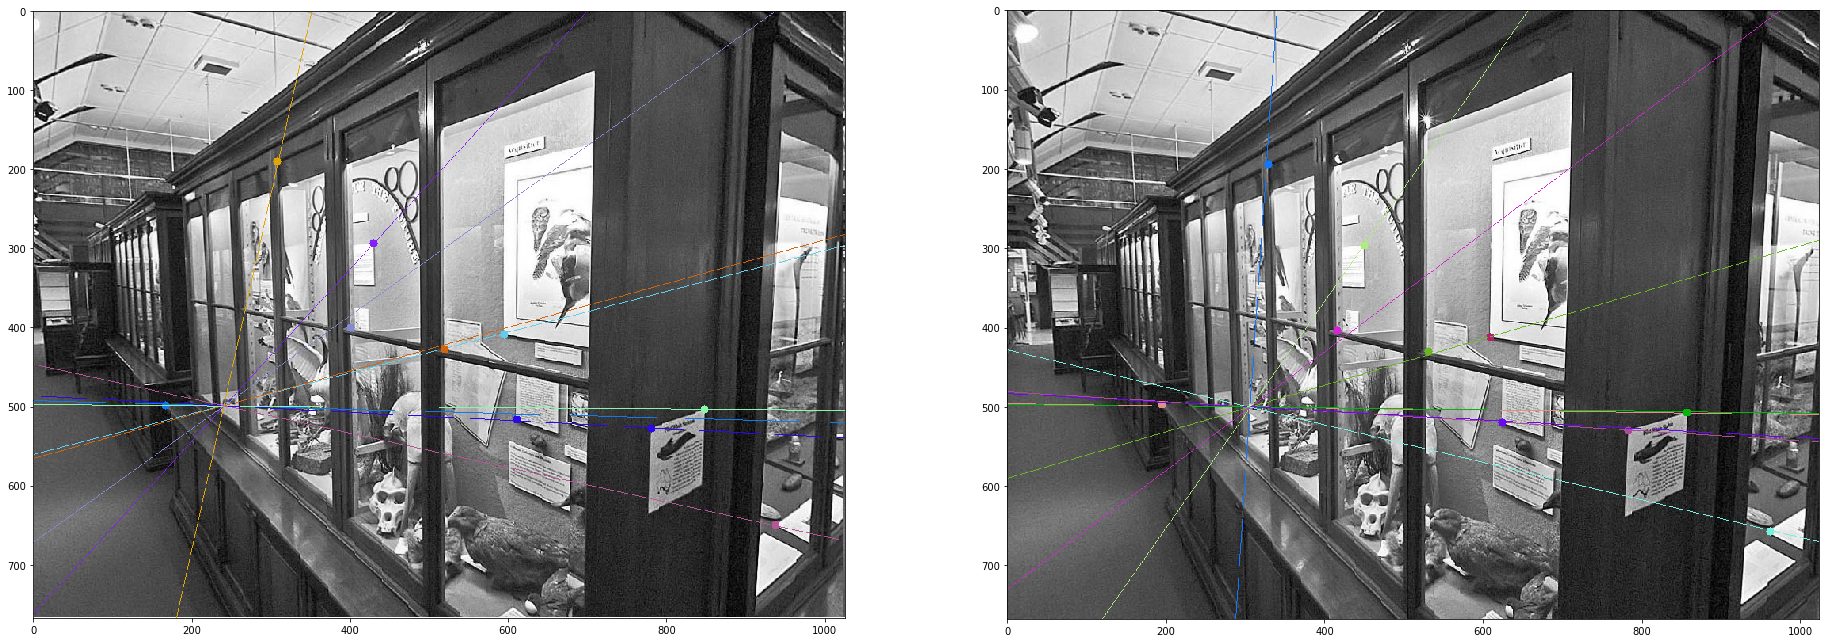

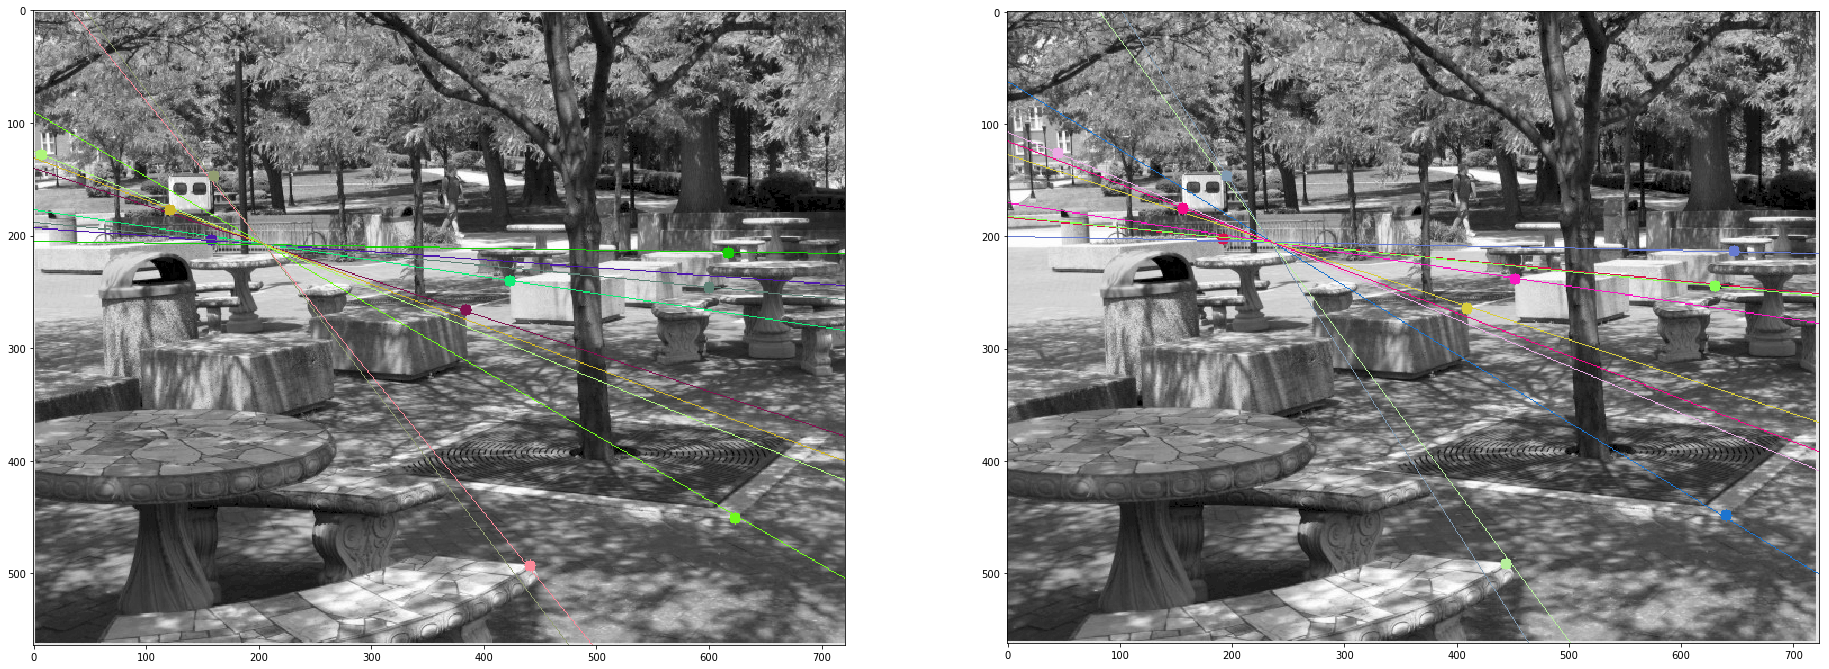

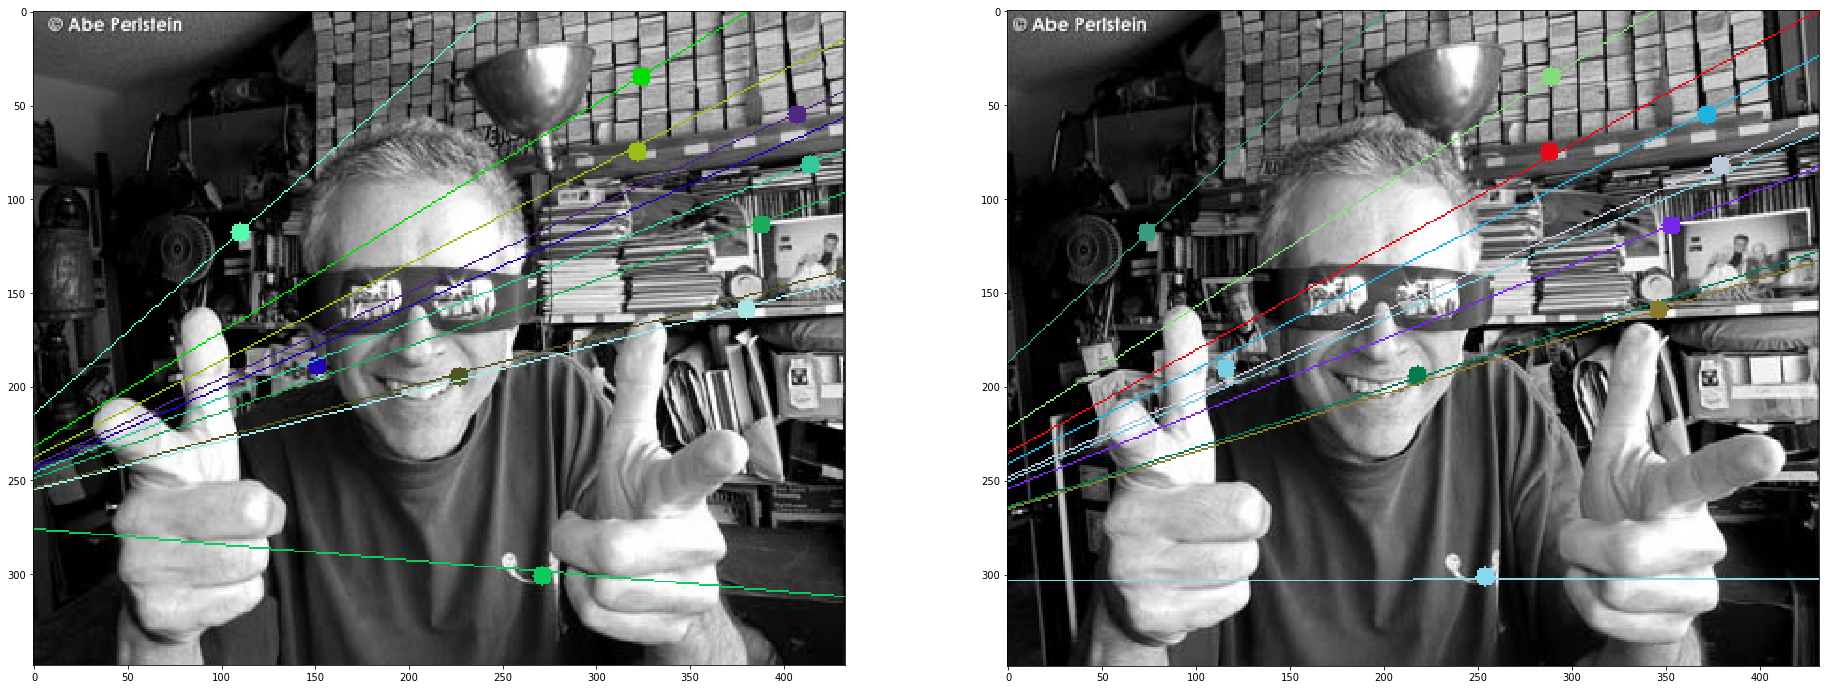

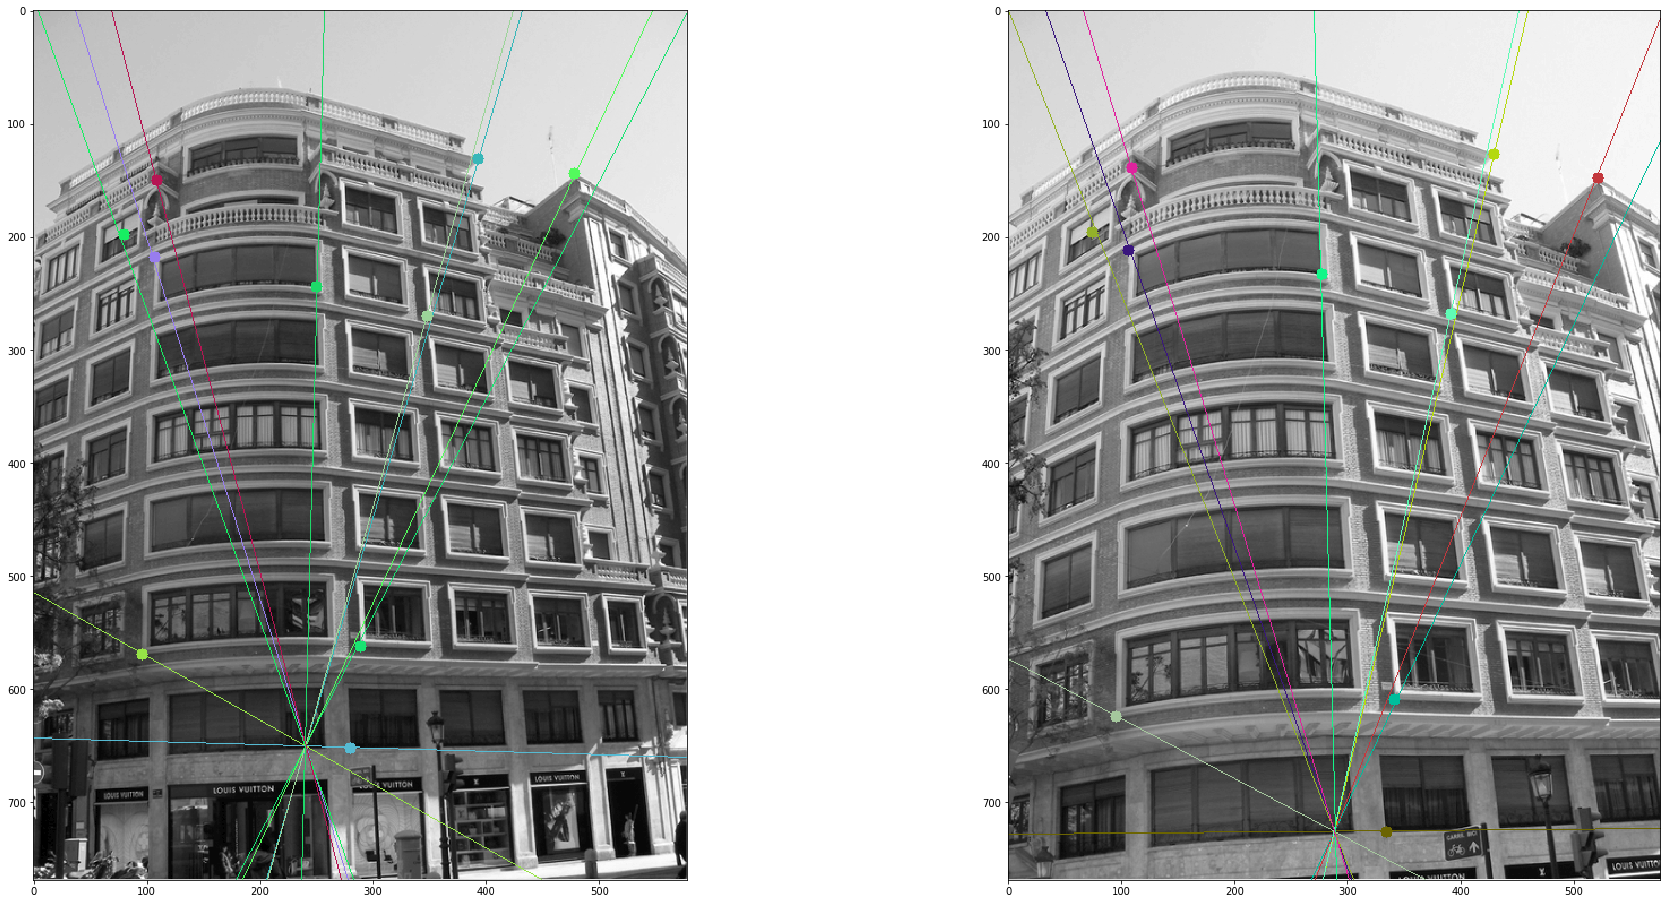

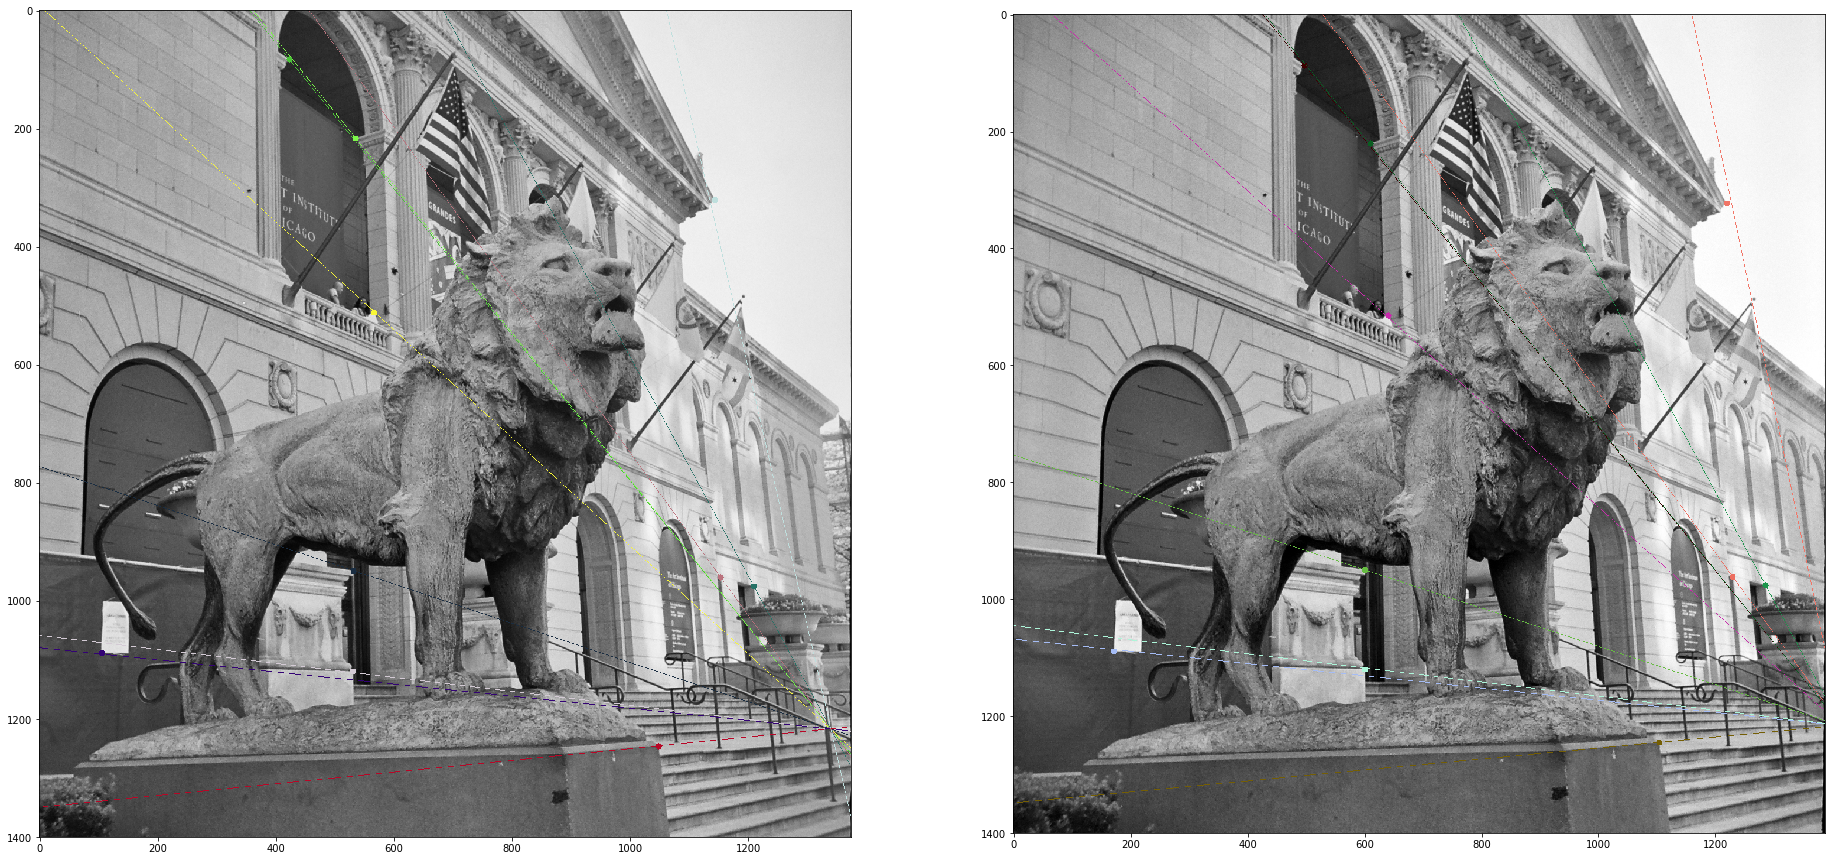

In [10]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
# x1 = torch.FloatTensor([[[781,528],[595,409],[167,499],[430,294],[520,428],[848,504],[611,517],[938,650],[308,191],[401,401]],[[623,451],[441,493],[384,266],[423,240],[158,204],[7,128],[617,215],[600,246],[160,147],[121,177]],[[314, 162],[258, 299],[387, 114],[180, 194],[206, 158],[192, 205],[116, 163],[163, 40],[431, 200],[423, 55]],[[96,569],[289,562],[393,131],[478,144],[107,218],[280,652],[348,270],[250,244],[80,198],[109,150]],[[1144,321],[531,1119],[532,949],[106,1088],[1049,1246],[424,83],[536,217],[567,512],[1210,975],[1154,960]]])
# x2 = torch.FloatTensor([[[783,530],[609,412],[195,497],[450,296],[531,430],[857,507],[624,520],[962,657],[329,194],[416,404]],[[640,449],[444,492],[409,265],[452,239],[192,203],[45,127],[647,214],[630,245],[195,147],[156,176]],[[281, 162],[241, 299],[353, 114],[171, 192],[200, 156],[185, 207],[82, 163],[127, 40],[396, 200],[389, 55]],[[95,624],[341,609],[429,127],[521,148],[106,212],[334,726],[391,268],[277,233],[74,196],[109,139]],[[1220,323],[601,1120],[601,950],[172,1089],[1104,1245],[498,88],[611,221],[641,515],[1286,976],[1230,962]]])

x1 = torch.FloatTensor([[[781,528],[595,409],[167,499],[430,294],[520,428],[848,504],[611,517],[938,650],[308,191],[401,401]],[[623,451],[441,493],[384,266],[423,240],[158,204],[7,128],[617,215],[600,246],[160,147],[121,177]],[[388,114],[227,195],[322,75],[271,301],[151,189],[407,55],[380,159],[324,35],[110,118],[414,82]],[[96,569],[289,562],[393,131],[478,144],[107,218],[280,652],[348,270],[250,244],[80,198],[109,150]],[[1144,321],[531,1119],[532,949],[106,1088],[1049,1246],[424,83],[536,217],[567,512],[1210,975],[1154,960]]])
x2 = torch.FloatTensor([[[783,530],[609,412],[195,497],[450,296],[531,430],[857,507],[624,520],[962,657],[329,194],[416,404]],[[640,449],[444,492],[409,265],[452,239],[192,203],[45,127],[647,214],[630,245],[195,147],[156,176]],[[353,114],[218,194],[288,75],[254,301],[116,190],[372,55],[346,159],[289,35],[74,118],[379,82]],[[95,624],[341,609],[429,127],[521,148],[106,212],[334,726],[391,268],[277,233],[74,196],[109,139]],[[1220,323],[601,1120],[601,950],[172,1089],[1104,1245],[498,88],[611,221],[641,515],[1286,976],[1230,962]]])
for i in range(5):
    pts1 = x1[i].numpy()
    pts2 = x2[i].numpy()
    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    F = F1[i].numpy() 
    img1 = cv2.imread('./Stereo_images/image'+str(i+1)+'1.png',0)  #queryimage # left image
    img2 = cv2.imread('./Stereo_images/image'+str(i+1)+'2.png',0) #trainimage # right image

    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
    lines1 = lines1.reshape(-1,3)
    img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

    # Find epilines corresponding to points in left image (first image) and
    # drawing its lines on right image
    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
    lines2 = lines2.reshape(-1,3)
    img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

    plt.figure(figsize=(32,16))
    plt.subplot(121),plt.imshow(img5)
    plt.subplot(122),plt.imshow(img3)
    plt.show()